## KMeans from Scratch

In [699]:
# Random data
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_features=3, centers=3, n_samples=200 )

In [700]:
K = 3 #number of clusters
max_iters = 20 #number of times the k-mean should run

In [701]:
import random
def init_centroids(X,K):
    c = random.sample(list(X),K)
    return c

In [702]:
def closest_centroids(X,c):
    K = np.size(c,0)
    idx = np.zeros((np.size(X,0),1))
    arr = np.empty((np.size(X,0),1))
    for i in range(0,K):
        y = c[i]
        temp = np.ones((np.size(X,0),1))*y
        b = np.power(np.subtract(X,temp),2)
        a = np.sum(b,axis = 1)
        a = np.asarray(a)
        a.resize((np.size(X,0),1))
        #print(np.shape(a))
        arr = np.append(arr, a, axis=1)
    arr = np.delete(arr,0,axis=1)
    idx = np.argmin(arr, axis=1)
    return idx

In [703]:
def compute_centroids(X,idx,K):
    n = np.size(X,1)
    centroids = np.zeros((K,n))
    for i in range(0,K):
        ci = idx==i
        ci = ci.astype(int)
        total_number = sum(ci);
        ci.resize((np.size(X,0),1))
        total_matrix = np.matlib.repmat(ci,1,n)
        ci = np.transpose(ci)
        total = np.multiply(X,total_matrix)
        centroids[i] = (1/total_number)*np.sum(total,axis=0)
    return centroids

### K_Mean function for random data (datasets.make_blobs)

In [704]:
def kMean_dataset(X,initial_centroids,max_iters):
    m = np.size(X,0)
    n = np.size(X,1)
    K = np.size(initial_centroids,0)
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros((m,1))
    for i in range(1,max_iters):
        idx = closest_centroids(X,centroids)
        centroids = compute_centroids(X,idx,K)
         #print(centroids)
        plt.figure()   
        
        color=['red','blue','green','cyan','magenta','orange','purple','brown','pink','gray','olive','yellow']
        c= [ color[i] for i in list(np.array(y)%12) ] # get the color for each sample in X_lda
        plt.scatter(X[:, 0], X[:, 1], s=50, c=c,alpha=0.3) #alpha=0.1, c='red'
        plt.scatter(np.array(centroids)[:, 0], np.array(centroids)[:, 1], s=100, c='black', cmap='tab20b')
        plt.show()

    return centroids,idx

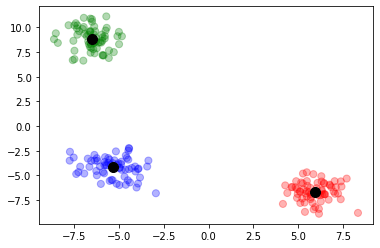

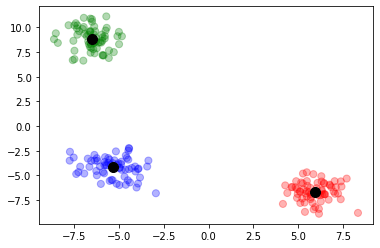

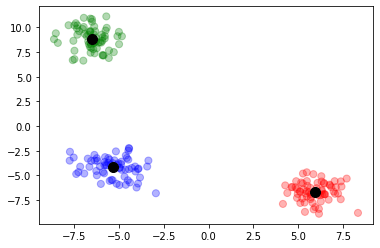

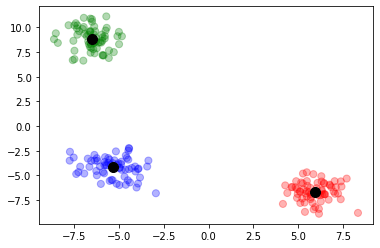

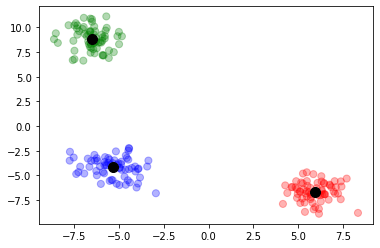

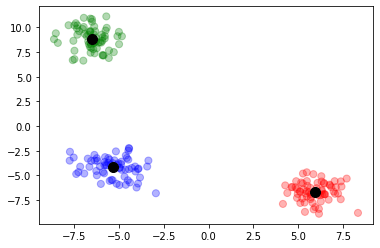

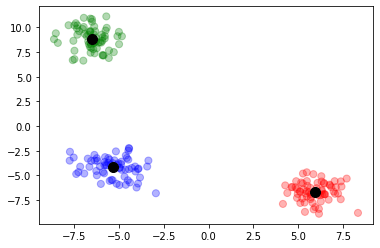

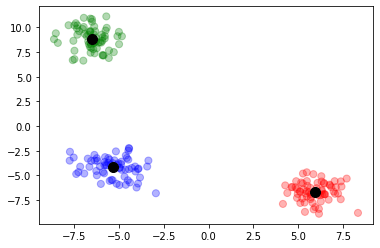

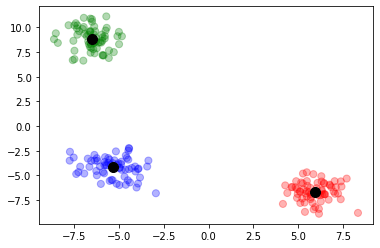

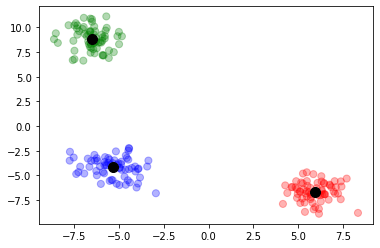

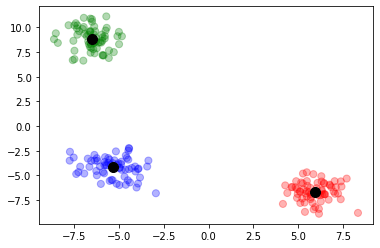

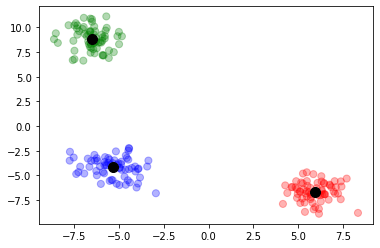

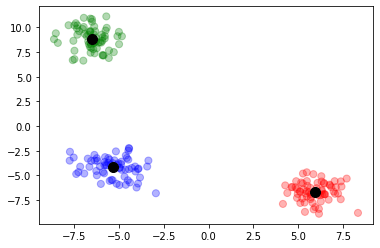

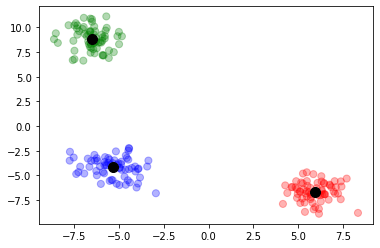

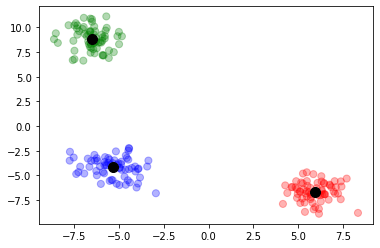

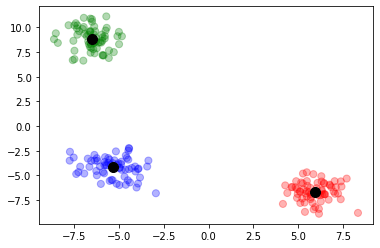

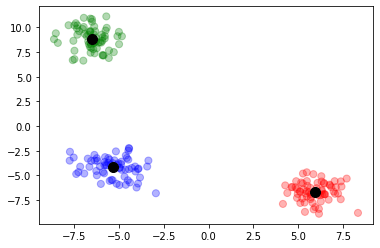

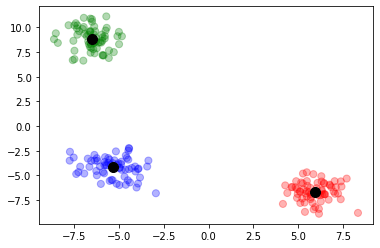

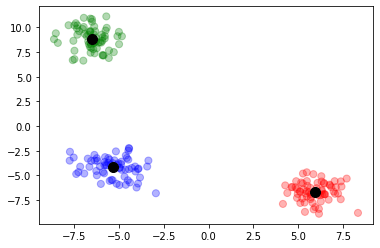

In [705]:
initial_centroids = init_centroids(X,K)

centroids,idx = kMean_dataset(X,initial_centroids,max_iters)

# The elbow Criterion Method, SSE 

##### The elbow method shows the optimal k for this dataset is 3

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

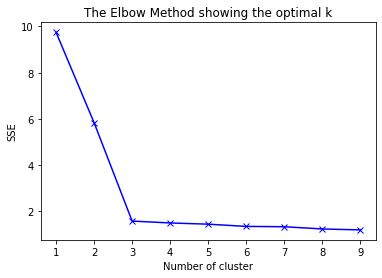

In [706]:

# from sklearn.cluster import KMeans
# from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

# X, y = make_blobs(n_features=3, centers=3, n_samples=300 )

# k means determine k
distortions = []
K = range(1,10)

for k in K:
    initial_centroids = init_centroids(X,k)
    centroids,idx = kMean_image(X,initial_centroids,max_iters)
    distortions.append(sum(np.min(cdist(X, centroids, 'euclidean'), axis=1)) / X.shape[0])


# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of cluster')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()
